# Exploratory Analysis of the Ames dataset

Discentes: Esdras G. Carvalho e Fernando V. dos Santos

As primeiras duas seções desse documento se referem ao download automatizado dos dados, seguido do preprocessamento e feature enginerring. Elas foram retiradas do material do professor, na íntegra e retirados alguns comentários e plots para diminuir a poluição visual.

### Seção 1

In [ ]:
import pathlib
import pickle
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
np.random.seed(42)


Primeiramente será realizado o download automatizado do dataset, caso o mesmo não esteja presente no diretório de trabalho.

In [ ]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
DATA_DIR.mkdir(parents=True, exist_ok=True)
raw_data_dir = DATA_DIR / 'raw'
raw_data_dir.mkdir(parents=True, exist_ok=True)
raw_data_file_path = DATA_DIR / 'raw' / 'ames.csv'
if not raw_data_file_path.exists():
    source_url = 'https://www.openintro.org/book/statdata/ames.csv'
    headers = {
        'User-Agent': \
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) ' \
            'AppleWebKit/537.36 (KHTML, like Gecko) ' \
            'Chrome/39.0.2171.95 Safari/537.36',
    }
    response = requests.get(source_url, headers=headers)
    csv_content = response.content.decode()
    with open(raw_data_file_path, 'w', encoding='utf8') as file:
        file.write(csv_content)

filesize = raw_data_file_path.stat().st_size
print(f'This file has {filesize} bytes')

Em seguida é realizado uma categorização dos atributos, para que seja possível uma melhor análise dos dados e preprocessamento.

In [ ]:
raw_data = pd.read_csv(raw_data_file_path)
data = raw_data.copy()


In [ ]:
ignore_variables = [
    'Order',
    'PID',
]

continuous_variables = [
    'Lot.Frontage',
    'Lot.Area',
    'Mas.Vnr.Area',
    'BsmtFin.SF.1',
    'BsmtFin.SF.2',
    'Bsmt.Unf.SF',
    'Total.Bsmt.SF',
    'X1st.Flr.SF',
    'X2nd.Flr.SF',
    'Low.Qual.Fin.SF',
    'Gr.Liv.Area',
    'Garage.Area',
    'Wood.Deck.SF',
    'Open.Porch.SF',
    'Enclosed.Porch',
    'X3Ssn.Porch',
    'Screen.Porch',
    'Pool.Area',
    'Misc.Val',
    'SalePrice',
]

discrete_variables = [
    'Year.Built',
    'Year.Remod.Add',
    'Bsmt.Full.Bath',
    'Bsmt.Half.Bath',
    'Full.Bath',
    'Half.Bath',
    'Bedroom.AbvGr',
    'Kitchen.AbvGr',
    'TotRms.AbvGrd',
    'Fireplaces',
    'Garage.Yr.Blt',
    'Garage.Cars',
    'Mo.Sold',
    'Yr.Sold',
]

ordinal_variables = [
    'Lot.Shape',
    'Utilities',
    'Land.Slope',
    'Overall.Qual',
    'Overall.Cond',
    'Exter.Qual',
    'Exter.Cond',
    'Bsmt.Qual',
    'Bsmt.Cond',
    'Bsmt.Exposure',
    'BsmtFin.Type.1',
    'BsmtFin.Type.2',
    'Heating.QC',
    'Electrical',
    'Kitchen.Qual',
    'Functional',
    'Fireplace.Qu',
    'Garage.Finish',
    'Garage.Qual',
    'Garage.Cond',
    'Paved.Drive',
    'Pool.QC',
    'Fence',
]

categorical_variables = [
    'MS.SubClass',
    'MS.Zoning',
    'Street',
    'Alley',
    'Land.Contour',
    'Lot.Config',
    'Neighborhood',
    'Condition.1',
    'Condition.2',
    'Bldg.Type',
    'House.Style',
    'Roof.Style',
    'Roof.Matl',
    'Exterior.1st',
    'Exterior.2nd',
    'Mas.Vnr.Type',
    'Foundation',
    'Heating',
    'Central.Air',
    'Garage.Type',
    'Misc.Feature',
    'Sale.Type',
    'Sale.Condition',
]

In [ ]:
data.drop(columns=['Order', 'PID'], inplace=True)
for col in continuous_variables:
    data[col] = data[col].astype('float64')
for col in categorical_variables:
    data[col] = data[col].astype('category')

for col in discrete_variables:
    data[col] = data[col].astype('float64')

In [ ]:
category_orderings = {
    'Lot.Shape': [
        'Reg',
        'IR1',
        'IR2',
        'IR3',
    ],
    'Utilities': [
        'AllPub',
        'NoSewr',
        'NoSeWa',
        'ELO',
    ],
    'Land.Slope': [
        'Gtl',
        'Mod',
        'Sev',
    ],
    'Overall.Qual': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ],
    'Overall.Cond': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ],
    'Exter.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Exter.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Bsmt.Exposure': [
        'Gd',
        'Av',
        'Mn',
        'No',
        'NA',
    ],
    'BsmtFin.Type.1': [
        'GLQ',
        'ALQ',
        'BLQ',
        'Rec',
        'LwQ',
        'Unf',
    ],
    'BsmtFin.Type.2': [
        'GLQ',
        'ALQ',
        'BLQ',
        'Rec',
        'LwQ',
        'Unf',
    ],
    'Heating.QC': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Electrical': [
        'SBrkr',
        'FuseA',
        'FuseF',
        'FuseP',
        'Mix',
    ],
    'Kitchen.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Functional': [
        'Typ',
        'Min1',
        'Min2',
        'Mod',
        'Maj1',
        'Maj2',
        'Sev',
        'Sal',
    ],
    'Fireplace.Qu': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Garage.Finish': [
        'Fin',
        'RFn',
        'Unf',
    ],
    'Garage.Qual': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',
    ],
    'Garage.Cond': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
        'Po',    
    ],
    'Paved.Drive': [
        'Y',
        'P',
        'N',
    ],
    'Pool.QC': [
        'Ex',
        'Gd',
        'TA',
        'Fa',
    ],
    'Fence': [
        'GdPrv',
        'MnPrv',
        'GdWo',
        'MnWw',
    ],
}


In [ ]:
for col, orderings in category_orderings.items():
    data[col] = data[col] \
        .astype('category') \
        .cat \
        .set_categories(orderings, ordered=True)

Salvar os dados preprocessados em um arquivo csv para que possa ser utilizado em outros notebooks.

In [ ]:
processed_dir = DATA_DIR / 'processed'
processed_dir.mkdir(parents=True, exist_ok=True)
processed_file_path = processed_dir / 'ames_with_correct_types.pkl'
with open(processed_file_path, 'wb') as file:
    pickle.dump(
        [
            data,
            continuous_variables,
            discrete_variables,
            ordinal_variables,
            categorical_variables,
        ],
        file,
    )


### Seção 2

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'


## Analyzing the columns individually

Let's load the data from the previous section - this way we don't need to re-run all of the previous data adjusting:

In [ ]:
processed_file_path = DATA_DIR / 'processed' / 'ames_with_correct_types.pkl'

with open(processed_file_path, 'rb') as file:
    (
        data,
        continuous_variables,
        discrete_variables,
        ordinal_variables,
        categorical_variables,
    ) = pickle.load(file)


### A first look at the categorical variables

In [ ]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

In [ ]:
# plot_categoricals(data, categorical_variables)

It is important to notice:

- There are variables that have many categories with little representation. 
    - It may be interesting to remove the minor categories, and make a note that the model that we are developing is not suitable to process houses of these categories. 
    - Or we may decide to ignore columns of this nature altogether.
    - A third option is to group the minor categories into a new category named `Other`, to indicate that we are not ignoring these properties, but we don't have enough evidence to infer the effect of the precise minor categories into the sale price.
- Some variables contain a great number of missing values. 
    - It may be better to drop those columns,
    - or to assign all missing values to a newly created `Unknown` category



In order to simplify the data (CAREFUL: we may end up damaging the model here! If the future model is not performing well, it could be interesting to revisit these assumptions), we will process each variable, remove outliers, etc.

#### Residential zoning, sales types and conditions (`MS.Zoning`, `Sale.Type`, and `Sale.Condition`)

Lets concentrate first on residential sales types:

In [ ]:
data['MS.Zoning'].unique()

In [ ]:
data['MS.Zoning'].value_counts()

We observe that a small number of sales are for non-residential properties, namely the categories `C (all)`, `A (agr)`, and `I (all)`. Let's remove them.

In [ ]:
selection = ~(data['MS.Zoning'].isin(['A (agr)', 'C (all)', 'I (all)']))
selection.value_counts()

So far, so good.

In [ ]:
data = data[selection]

After removing those undesired rows, lets remove the unused categories

In [ ]:
data['MS.Zoning'] = data['MS.Zoning'].cat.remove_unused_categories()

In [ ]:
data['Sale.Type'].unique()

*AHA!* Careful with the name of the categories! The category `"WD "` has a space in it! Too many hours were spent debugging this kind of thing.

In [ ]:
data['Sale.Condition'].value_counts()

Upon careful analysis, looks like all types of sales and conditions are valid. But we need to be careful with the low representativity of some categories in both `Sale.Type` and `Sale.Condition`. Let's do some category reassigning:

- All warranty deed types will go into a `GroupedWD` category;
- Category `New` stays as-is.
- All the remaining minor categories go into an `Other` category.

In [ ]:
processed_data = data.copy()

In [ ]:
from typing import Tuple

def remap_categories(
    series: pd.Series,
    old_categories: Tuple[str],
    new_category: str,
) -> pd.Series:
    # Add the new category to the list of valid categories.
    series = series.cat.add_categories(new_category)

    # Set all items of the old categories as the new category.
    remapped_items = series.isin(old_categories)
    series.loc[remapped_items] = new_category

    # Clean up the list of categories, the old categories no longer exist.
    series = series.cat.remove_unused_categories()

    return series


In [ ]:
processed_data['Sale.Type'] = remap_categories(
    series=processed_data['Sale.Type'],
    old_categories=('WD ', 'CWD', 'VWD'),
    new_category='GroupedWD',
)

processed_data['Sale.Type'] = remap_categories(
    series=processed_data['Sale.Type'],
    old_categories=('COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw'),
    new_category='Other',
)

In [ ]:
processed_data['Sale.Type'].value_counts()

Much better!

In [ ]:
data = processed_data

#### Street paving (`Street`)

Now lets focus on street paving (`Street`):

In [ ]:
data['Street'].value_counts()

The very low representativity of the minor class `Grvl` forces us to ignore this column altogether:

In [ ]:
data = data.drop(columns='Street')

#### House surroundings (`Condition.1` and `Condition.2`)

Let's check for conditions (`Condition.1` and `Condition.2`) pertaining to the house surroundings:

In [ ]:
data['Condition.1'].value_counts()

In [ ]:
data['Condition.2'].value_counts()

In [ ]:
pd.crosstab(data['Condition.1'], data['Condition.2'])

In [ ]:
processed_data = data.copy()

In [ ]:
for col in ('Condition.1', 'Condition.2'):
    processed_data[col] = remap_categories(
        series=processed_data[col],
        old_categories=('RRAn', 'RRAe', 'RRNn', 'RRNe'),
        new_category='Railroad',
    )
    processed_data[col] = remap_categories(
        series=processed_data[col],
        old_categories=('Feedr', 'Artery'),
        new_category='Roads',
    )
    processed_data[col] = remap_categories(
        series=processed_data[col],
        old_categories=('PosA', 'PosN'),
        new_category='Positive',
    )

In [ ]:
processed_data['Condition.1'].value_counts()

In [ ]:
processed_data['Condition.2'].value_counts()

In [ ]:
pd.crosstab(processed_data['Condition.1'], processed_data['Condition.2'])

In [ ]:
processed_data['Condition'] = pd.Series(
    index=processed_data.index,
    dtype=pd.CategoricalDtype(categories=(
        'Norm',
        'Railroad',
        'Roads',
        'Positive',
        'RoadsAndRailroad',
    )),
)

In [ ]:
norm_items = processed_data['Condition.1'] == 'Norm'
processed_data['Condition'][norm_items] = 'Norm'

In [ ]:
railroad_items = \
    (processed_data['Condition.1'] == 'Railroad') \
    & (processed_data['Condition.2'] == 'Norm')
processed_data['Condition'][railroad_items] = 'Railroad'

In [ ]:
roads_items = \
    (processed_data['Condition.1'] == 'Roads') \
    & (processed_data['Condition.2'] != 'Railroad')
processed_data['Condition'][roads_items] = 'Roads'

In [ ]:
positive_items = processed_data['Condition.1'] == 'Positive'
processed_data['Condition'][positive_items] = 'Positive'

In [ ]:
roads_and_railroad_items = \
    ( \
        (processed_data['Condition.1'] == 'Railroad') \
        & (processed_data['Condition.2'] == 'Roads')
    ) \
    | ( \
        (processed_data['Condition.1'] == 'Roads') \
        & (processed_data['Condition.2'] == 'Railroad') \
    )
processed_data['Condition'][roads_and_railroad_items] = 'RoadsAndRailroad'

In [ ]:
processed_data['Condition'].value_counts()

There is no apparent need, for now, to go into further simplification of this variable. Lets drop the original variables:

In [ ]:
processed_data = processed_data.drop(columns=['Condition.1', 'Condition.2'])

In [ ]:
data = processed_data

#### Columns with many missing values (`Misc.Feature` and `Alley`)

The columns `Misc.Feature` and `Alley` are mostly formed by missing values!

In [ ]:
plot_categoricals(data, ['Misc.Feature', 'Alley'])

But it looks like we can reuse this information, still. We can transform the `Misc.Feature` variable into a `HasShed` variable that indicates whether the house has a shed:

In [ ]:
data['HasShed'] = data['Misc.Feature'] == 'Shed'
data = data.drop(columns='Misc.Feature')

In [ ]:
data['HasShed'].value_counts()

Likewise, we can mutate the `Alley` feature into a `HasAlley` feature:

In [ ]:
data['HasAlley'] = ~data['Alley'].isna()
data = data.drop(columns='Alley')

In [ ]:
data['HasAlley'].value_counts()

#### Exterior coverings (`Exterior.1st` and `Exterior.2nd`)

The exterior coverings have a lot of categories, some with very low representativity:

In [ ]:
plot_categoricals(data, ['Exterior.1st', 'Exterior.2nd'])

Also, it looks like there are a few typos!


| `Exterior.1st` | `Exterior.2nd` | `Correct value` |
|----------------|----------------|-----------------|
| `BrkComm`      | `Brk Cmn`      | `BrkComm`       |
| `CemntBd`      | `CmentBd`      | `CemntBd`       |
| `WdShing`      | `Wd Shng`      | `WdShing`       |

Lets fix those

In [ ]:
data['Exterior.2nd'] = remap_categories(
    series=data['Exterior.2nd'],
    old_categories=('Brk Cmn', ),
    new_category='BrkComm',
)
data['Exterior.2nd'] = remap_categories(
    series=data['Exterior.2nd'],
    old_categories=('CmentBd', ),
    new_category='CemntBd',
)
data['Exterior.2nd'] = remap_categories(
    series=data['Exterior.2nd'],
    old_categories=('Wd Shng', ),
    new_category='WdShing',
)


In [ ]:
for col in ('Exterior.1st', 'Exterior.2nd'):
    categories = data[col].cat.categories
    data[col] = data[col].cat.reorder_categories(sorted(categories))

In [ ]:
pd.crosstab(data['Exterior.1st'], data['Exterior.2nd'])

It looks like there are a few popular options and lots of poorly represented materials beyond the popular ones. Due to lack of representativity, lets keep only the popular categories as-is, and group the rest into an `Other` category.

Also, looks like it is often the case that the first material is the same as the second material, probably to indicate that the house exterior contains only one material. Therefore, we will keep only the `Exterior.1st` variable.

In [ ]:
processed_data = data.copy()

In [ ]:
mat_count = processed_data['Exterior.1st'].value_counts()
mat_count

In [ ]:
rare_materials = list(mat_count[mat_count < 40].index)
rare_materials

In [ ]:
processed_data['Exterior'] = remap_categories(
    series=processed_data['Exterior.1st'],
    old_categories=rare_materials,
    new_category='Other',
)
processed_data = processed_data.drop(columns=['Exterior.1st', 'Exterior.2nd'])

In [ ]:
processed_data['Exterior'].value_counts()

In [ ]:
data = processed_data

#### `Heating`

In [ ]:
plot_categoricals(data, ['Heating',])

This column does not have missing values, and an overwhelming amount of items belong to the same category. As such, there is not much information here, lets discard the column.

In [ ]:
data = data.drop(columns='Heating')

#### `Roof.Matl` and `Roof.Style`

In [ ]:
plot_categoricals(data, ['Roof.Matl', 'Roof.Style'])

Due to the low representativity of the minor categories in the `Roof.Matl` feature, we will drop it.

In [ ]:
data = data.drop(columns='Roof.Matl')

In the `Roof.Style` feature we have two substantial categories, and a few very minor ones. Lets group the minor categories into an `Other` category:

In [ ]:
data['Roof.Style'] = remap_categories(
    series=data['Roof.Style'],
    old_categories=[
        'Flat',
        'Gambrel',
        'Mansard',
        'Shed',
    ],
    new_category='Other',
)

In [ ]:
data['Roof.Style'].value_counts()

#### `Mas.Vnr.Type`

In [ ]:
data['Mas.Vnr.Type'].info()

In [ ]:
data['Mas.Vnr.Type'].value_counts()

Lets group the two minor classes into an `Other` class:

In [ ]:
data['Mas.Vnr.Type'] = remap_categories(
    series=data['Mas.Vnr.Type'],
    old_categories=[
        'BrkCmn',
        'CBlock',
    ],
    new_category='Other',
)

Also, lets add the missing entries to the `None` category, since we have no evidence of the veneer type here.

In [ ]:
data['Mas.Vnr.Type'] = data['Mas.Vnr.Type'].cat.add_categories('None')
data['Mas.Vnr.Type'][data['Mas.Vnr.Type'].isna()] = 'None'


In [ ]:
data['Mas.Vnr.Type'].value_counts()

#### `MS.SubClass`

In [ ]:
plot_categoricals(data, ['MS.SubClass'])

This is a complicated feature, lets look at the documentation:

```
MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
```

This is the moment where you reach out to a real-estate agent and ask what is the meaning of these categories, and whether they can they be meaningfully grouped together. For now lets just reassign the minor categories to an `Other` category:

In [ ]:
data['MS.SubClass'] = remap_categories(
    series=data['MS.SubClass'],
    old_categories=[75, 45, 180, 40, 150],
    new_category='Other',
)

In [ ]:
data['MS.SubClass'].value_counts()

#### `Foundation`

In [ ]:
plot_categoricals(data, ['Foundation'])

Same story: minor categories grouped into an `Other` category.

In [ ]:
data['Foundation'] = remap_categories(
    series=data['Foundation'],
    old_categories=['Slab', 'Stone', 'Wood'],
    new_category='Other',
)

#### `Neighborhood`

In [ ]:
data['Neighborhood'].value_counts()

We can either group the minor categories into an `Other` category, or drop the rows. Both approaches have their pros and cons:

- If we delete the rows we are being more precise, in the sense that we restrict our model to fewer neighborhoods.
- If we mantain the rows we have more data to construct the model.

Lets drop the rows and make a note that this model does not work for those neighborhoods.

In [ ]:
selection = ~data['Neighborhood'].isin([
    'Blueste',
    'Greens',
    'GrnHill',
    'Landmrk',
])
data = data[selection]

In [ ]:
data['Neighborhood'] = data['Neighborhood'].cat.remove_unused_categories()

In [ ]:
data['Neighborhood'].value_counts()

#### `Garage.Type`

In [ ]:
data['Garage.Type'].info()

In [ ]:
data['Garage.Type'].value_counts()

Looks like there are a few residences that do not have a garage, lets create a `NoGarage` category for them.

In [ ]:
data['Garage.Type'] = data['Garage.Type'].cat.add_categories(['NoGarage'])
data['Garage.Type'][data['Garage.Type'].isna()] = 'NoGarage'

In [ ]:
data['Garage.Type'].value_counts()

### A final look at the categorical variables

After all of this processing, even the set of categorical variables has changed, so lets make a new list:

In [ ]:
all_categorical = data.select_dtypes('category').columns

new_categorical_variables = [ \
    col for col in all_categorical \
    if not col in ordinal_variables \
]

In [ ]:
# plot_categoricals(data, new_categorical_variables)

Looks like we are done with the categorical variables, yay! Notice that there are no more missing values among the categorical variables!

### Analyzing the ordinal variables

Lets take a first look:

In [ ]:
# plot_categoricals(data, ordinal_variables, sorted=False)

Ouch! Again, we suffer from the existence of categories with very low representativity! But here, different from the nominal variables, we have a choice. If we model the ordinal variables as increaasing numbers (we'll do that when preparing the data for the model), than the low representativity of some categories is no longer a problem: it is just a number that does not occur often!

So the only problems to address here are:

- Extreme cases of low representativity: the `Utilities` feature.
- Large number of missing values.

#### `Utilities`

This one is easy: the low representativity here is so extreme that we will just drop this column.

In [ ]:
data = data.drop(columns='Utilities')

#### Large number of missing values

There are aa few different cases here:


##### `Pool.QC`

Negligible information here, drop the column.

In [ ]:
data = data.drop(columns='Pool.QC')

##### `Fence`

This is interesting. The documentation says:

```
Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
```

Since the `Fence` feature means to convey the level of privacy that a fence brings to the residence, we can create a new category `NoFence` and set it to be the category with the lowest privacy level! Then we mark all missing values as `NoFence`!

In [ ]:
data['Fence'].value_counts().sort_index()

In [ ]:
old_categories = list(data['Fence'].cat.categories)
old_categories

In [ ]:
new_categories = old_categories + ['NoFence']
new_categories

In [ ]:
data['Fence'] = data['Fence'].cat.set_categories(new_categories)

In [ ]:
data['Fence'].dtype

In [ ]:
data['Fence'][data['Fence'].isna()] = 'NoFence'

In [ ]:
data['Fence'].value_counts().sort_index()

##### `Fireplace.Qu`

This is a hard one. There is a lot of information there, but also a lot of missing values with no obvious way to transform them into something meaningful (like in the `Fence` case).

In [ ]:
data['Fireplace.Qu'].value_counts().sort_index()

Observe that most fireplace quality indicators are between "good" and "typical". Also notice that there is a variable `Fireplaces` that list how many fireplaces a house has.

In [ ]:
data['Fireplaces'].value_counts()

These observations give us an alternative here: drop the `Fireplace.Qu` column. Reasons:

- If there is a fireplace, it will usually be "good" or "typical" - there is a fair amount of lower and higher level fireplaces, but we have to choose to ignore something;
- The `Fireplaces` variable already conveys the idea of whether there is a fireplace (or many).

In [ ]:
data = data.drop(columns='Fireplace.Qu')

##### `Garage.Cond`, `Garage.Qual`, `Garage.Finish`

All of these variables (plus the `Garage.Yr.Blt`) have the same number of non-missing entries:

In [ ]:
plot_categoricals(
    data,
    [
        'Garage.Cond',
        'Garage.Qual',
        'Garage.Finish',
    ],
    sorted=False,
)

While the `Garage.Cond` and `Garage.Qual` features can be ignored, the `Garage.Finish` feature seems to have relevant information. What to do?

In [ ]:
data = data.drop(columns=['Garage.Cond', 'Garage.Qual'])


As always, some information will be discarded in one way or another. In this case we can transform the `Garage.Finish` variable from an ordinal variable to a nominal variable - that is, we discard the ordering of the finishing levels. This way we can create a new category `NoGarage` to account for the missing values.

In [ ]:
data['Garage.Finish'] = data['Garage.Finish'] \
    .cat \
    .as_unordered() \
    .cat \
    .add_categories(['NoGarage'])
data['Garage.Finish'][data['Garage.Finish'].isna()] = 'NoGarage'

In [ ]:
data['Garage.Finish'].value_counts()

In [ ]:
data['Garage.Finish'].dtype

In [ ]:
data['Garage.Finish'].cat.ordered

##### `Electrical`

In [ ]:
data['Electrical'].isna().value_counts()

In [ ]:
plot_categoricals(data, ['Electrical'], sorted=False)

So we can drop the only row with a missing value for the `Electrical` variable, or we can fill it with something. Given the high prevalence of the `SBrkr` category, lets set the missing value as that.

In [ ]:
data['Electrical'][data['Electrical'].isna()] = 'SBrkr'

In [ ]:
ordinal_columns = [col for col in data.select_dtypes('category') if data[col].cat.ordered]

In [ ]:
data[ordinal_columns].info()

##### `Bsmt.Qual`, `Bsmt.Cond`, `Bsmt.Exposure`, `BsmtFin.Type.1`, `BsmtFin.Type.2`

In [ ]:
plot_categoricals(
    data,
    [
        'Bsmt.Qual',
        'Bsmt.Cond',
        'Bsmt.Exposure',
        'BsmtFin.Type.1',
        'BsmtFin.Type.2',
    ],
    sorted=False,
)

For `Bsmt.Exposure`, lets assign the missing entries to the `NA` category. For all the other columns (`Bsmt.Qual`, `Bsmt.Cond`, `BsmtFin.Type.1`, `BsmtFin.Type.2`) lets also create the `NA` category and assign the missing entries to that category. Finally, since the `NA` category does not fit into a sequence with the other classes, lets convert these columns to nominal (that is, categoricals without category order). Notice that in this case we need to eliminate the unused categories.

In [ ]:
data['Bsmt.Exposure'].unique()

In [ ]:
data['Bsmt.Exposure'][data['Bsmt.Exposure'].isna()] = 'NA'
data['Bsmt.Exposure'] = data['Bsmt.Exposure'] \
    .cat \
    .as_unordered() \
    .cat \
    .remove_unused_categories()

In [ ]:
for col in ('Bsmt.Qual', 'Bsmt.Cond', 'BsmtFin.Type.1', 'BsmtFin.Type.2'):
    data[col] = data[col].cat.add_categories(['NA'])
    data[col][data[col].isna()] = 'NA'
    data[col] = data[col] \
        .cat \
        .as_unordered() \
        .cat \
        .remove_unused_categories()

In [ ]:
plot_categoricals(
    data,
    [
        'Bsmt.Qual',
        'Bsmt.Cond',
        'Bsmt.Exposure',
        'BsmtFin.Type.1',
        'BsmtFin.Type.2',
    ],
    sorted=False,
)

Lets also place the entries from the minor categories of `Bsmt.Cond` into neighboring categories, to simplify the dataset.


In [ ]:
data['Bsmt.Cond'][data['Bsmt.Cond'] == 'Po'] = 'Fa'
data['Bsmt.Cond'][data['Bsmt.Cond'] == 'Ex'] = 'Gd'
data['Bsmt.Cond'] = data['Bsmt.Cond'].cat.remove_unused_categories()

In [ ]:
data['Bsmt.Cond'].value_counts()

In [ ]:
data[ordinal_columns].info()

Great! All ordinal variables are corrected!

### Analyzing the continuous variables

Lets look for missing values, anomalies, outliers, and all sorts of things that may hinder our modeling.

In [ ]:
def plot_numericals(data, cols):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    n = data.shape[0]
    b = int(np.sqrt(n))
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        data[col].plot.hist(bins=b)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

# plot_numericals(data, data.select_dtypes('number').columns)

#### `SalePrice`

Ah, the target! The most special feature of all! Sale prices have a few special properties:

- They are always non-negative, and most likely have a min value that is positive.
- The *importance of the difference* of sale prices is not absolute: a difference of $10k in a house valued at $100k is a lot (10%), but in a house valued at $1M is negligible.

These characteristics suggest something important: maybe our model should predict the *logarithm* of the sale price, rather than the actual price! This way, errors are associated with proportions, rather than absolute values! 

Lets analyze the previous sentence mathematically. Call $P$ the real value of a house, and $\hat{P}$ the value given by our (yet to be developed) model. However, since we will work with the logarithm of $P$ and $\hat{P}$ instead, lets name the log-values as well: $y = \log_{10}{(P)}$ and $\hat{y} = \log_{10}{(\hat{P})}$.

(Why base $10$? Mere convenience: the value of $y$ or $\hat{y}$ can be immediately associated with the base-$10$ magnitude of the house price they represent. For instance: $y = 5.6$ implies $P = 10^{5.6} = 10^{0.6} \times 10^{5}$, which is something in the range of hundreds of thousands. So, take the integer part of the base-$10$ logarithm and you automatically have the order of magnitude of the price).

Now, when we have a prediction value $\hat{y}$ for a house with log-price $y$, the error is $\varepsilon = (\hat{y} - y)$. Substituting the definitions of $y$ and $\hat{y}$ we have:

$$
\varepsilon = \hat{y} - y = \log_{10}{(\hat{P})} - \log_{10}{(P)} = \log_{10}{\left(\frac{\hat{P}}{P}\right)}
$$

Therefore we can obtain the prediction error for this house as a fraction:

$$
10^{\varepsilon} = 10^{\log_{10}{\left(\frac{\hat{P}}{P}\right)}} = \frac{\hat{P}}{P}
$$

And we can convert it into a percentage:

$$
\varepsilon_{\%} = 100 * (10^{\varepsilon} - 1) = 100 * \left(\frac{\hat{P}}{P} - 1\right) = 100 * \left(\frac{\hat{P} - P}{P}\right)
$$

Percentual errors are much more informative of the practical value of our (future) model. If I tell you that the average error of a model is 50k USD, is this good or bad? It depends on the price of the house we are considering: an error of 50k USD in a house valued at 250k USD is very significant, whereas if the house costed 10 million USD, then an error of 50k USD is quite acceptable. Now, if I tell you that the model has an average error of $5\%$, this is understandable across all ranges of house prices.


Lets work this out:

In [ ]:
data['SalePrice'].describe()

Lets remap the `SalePrice` variable to represent the base-10 logarithm of the original value. Again, why base 10? Any base will do, but the base 10 is a bit more interpretable: a value of 3 means thousands, 4 means tens of thousands, 6 means million, etc.

In [ ]:
data['SalePrice'] = data['SalePrice'].apply(np.log10)

In [ ]:
data['SalePrice'].describe()

#### `Lot.Frontage`

In [ ]:
data['Lot.Frontage'].info()

Plenty of missing values here, what do they mean? The documentation is not very helpful:

```
Lot Frontage (Continuous): Linear feet of street connected to property
```

Maybe the relation between this feature and some other feature will explain it.

In [ ]:
missing_lot_frontage = data['Lot.Frontage'].isna()

In [ ]:
data['MS.SubClass'][missing_lot_frontage].value_counts()

In [ ]:
data['Lot.Config'][missing_lot_frontage].value_counts()

In [ ]:
data['Land.Contour'][missing_lot_frontage].value_counts()

Nope, no obvious relationship. Is this column even useful for prediction? Lets compare it with `SalePrice`:

In [ ]:
data.plot.scatter(x='Lot.Frontage', y='SalePrice', alpha=0.1)
plt.ylabel('$\log_{10} SalePrice$')

Yikes, no way to ignore this feature! Can we at least relate it to `Lot.Area`?

In [ ]:
data[['Lot.Frontage', 'Lot.Area']].corr()

There is some correlation there, maybe the square-root of the lot area shows better correlation?

In [ ]:
aux_data = data[['Lot.Frontage', 'Lot.Area']].copy()
aux_data['Sqrt.Lot.Area'] = aux_data['Lot.Area'].apply(np.sqrt)

In [ ]:
aux_data[['Lot.Frontage', 'Sqrt.Lot.Area']].corr()

Nice! There is a healthy relationship between `Lot.Frontage` and the square root of `Lot.Area`!

In [ ]:
x = np.sqrt(data['Lot.Area'])
y = data['Lot.Frontage']
plt.scatter(x, y, alpha=0.2)
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.xlabel('$\sqrt{Lot.Area}$')
plt.ylabel('$Lot.Frontage$')
plt.title('Relationship between lot frontage and area')
plt.show()

We could *predict* the `Lot.Frontage` for the mising entries from the `Lot.Area` feature!

The task of filling up missing values is called **Imputation**. There are several imputation strategies, some of them are:

- Replace with some meaningful constant independent of the dataset - e.g. zero.
- Replace with a constant derived from the dataset, like the mean or median.
- Replace with a predicted value from other variables.

So, fitting a linear model to predict `Lot.Frontage` from the square root of `Lot.Area` could be a good alternative. But for now lets do the simplest thing: impute the missing values of `Lot.Frontage` simply with the median of `Lot.Frontage`. Once we are more familiar with modelling we can revisit this decision.

**Caution**: There is also the possibility that the missing values represent residences that *do not have a frontage*! No way to tell from the documentation or the relationship with other relevant variables! Another moment here where the really best course of action is to go back to the expert and ask questions, ok?

In [ ]:
data['Lot.Frontage'] = data['Lot.Frontage'].fillna(data['Lot.Frontage'].median())

In [ ]:
data['Lot.Frontage'].info()

#### `Garage.Yr.Blt` 

In [ ]:
data['Garage.Yr.Blt'].describe()

Oops! Looks like someone built a garage in the future!

The documentation states that the residential sales were collected from 2006 to 2010. We have the `Yr.Sold` variable to let us know when the house was sold. So we can obtain from those the information of how old the garage was when the house was sold! That is a better variable than `Garage.Yr.Blt` by itself.

In [ ]:
garage_age = data['Yr.Sold'] - data['Garage.Yr.Blt']
garage_age.describe()

Lets look at the garages "from the future"

In [ ]:
data[garage_age < 0.0].transpose()

Only two rows. One is an obvious mistake, the other looks somewhat legitimate: house was sold new in 2007, garage was only finished in 2008. We can safely correct these errors, but if there was any doubt about the validity of fixing them, it is better to get rid of the rows. In our case we will set the garage age to zero.

In [ ]:
garage_age[garage_age < 0.0] = 0.0

And now we remove the `Garage.Yr.Blt` column, replacing it with a new `Garage.Age` column.

In [ ]:
data = data.drop(columns='Garage.Yr.Blt')
data['Garage.Age'] = garage_age

What about the missing values of the new `Garage.Age` column?

In [ ]:
data['Garage.Age'].info()

In [ ]:
data['Garage.Type'][data['Garage.Age'].isna()].value_counts()

Seems like they correspond to the absence of garage. What is a reasonable value for imputation of `Garage.Age` when there is no garage? Zero? Median? 

Or drop the rows altogether? (Seems excessive!)

Lets just impute the median here. The logic is that we want to cause the least harm to the data by doing this.

In [ ]:
data['Garage.Age'] = data['Garage.Age'].fillna(data['Garage.Age'].median())

#### `Year.Remod.Add`, `Year.Built`

Lets apply the same age treatment to these variables

In [ ]:
data[['Year.Remod.Add', 'Year.Built', 'Yr.Sold']].describe()

In [ ]:
remod_age = data['Yr.Sold'] - data['Year.Remod.Add']
remod_age.describe()

Oops, another weirdness, lets check

In [ ]:
data[remod_age < 0.0].transpose()

Same story, lets set the remodeling age to zero for these cases

In [ ]:
remod_age[remod_age < 0.0] = 0.0

In [ ]:
house_age = data['Yr.Sold'] - data['Year.Built']
house_age.describe()

Again...

In [ ]:
data[house_age < 0.0].transpose()

Same approach, lets set the age to zero in this case.

In [ ]:
house_age[house_age < 0.0] = 0.0

In [ ]:
data = data.drop(columns=['Year.Remod.Add', 'Year.Built'])
data['Remod.Age'] = remod_age
data['House.Age'] = house_age

#### `Mas.Vnr.Area`

In [ ]:
data['Mas.Vnr.Area'].info()

Just a few missing values here. Do they correspond to the absence of veneer?

In [ ]:
data['Mas.Vnr.Type'][data['Mas.Vnr.Area'].isna()].value_counts()

Yep. Impute with zeros.

In [ ]:
data.loc[data['Mas.Vnr.Area'].isna(), 'Mas.Vnr.Area'] = 0.0

#### Features that contain a lot of zeros

In the case of features that contain a lot of zeros, it could be that the feature contains actual information in the non-zero cases, and zero to indicate that the feature is absent. Consider, for instance, the `Pool.Area` feature:

In [ ]:
num_houses = data.shape[0]
num_houses_with_pool = data[data['Pool.Area'] > 0].shape[0]
print(f'Out of {num_houses} houses, only {num_houses_with_pool} have a pool.')

What to do? Discard the column? Discard the rows (we don't appraise houses with pools!)? Transform the column into a categorical `HasPool`?

Actually, it depends on the model. A linear model, for instance, can safely process this column: since the pool area for houses without pools is zero, the contribution of the pool area to the house price will be zero (remember that a linear model associates a multiplicative coefficient for each variable).

So we leave them all as is! We can revisit our decisions once we play a bit with the predictive model *as long as we only use the training dataset* - more on this later.

#### Final cleanup

In [ ]:
data.info()

After all this effort, only a few columns have just one missing value! We suffered enough, lets just drop those rows.

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.info()

Nice, not a single missing value! Let us also remove unused categories, for good measure.

In [ ]:
for col in data.select_dtypes('category').columns:
    data[col] = data[col].cat.remove_unused_categories()

## Joint feature analysis

There are two types of joint feature analysis:

- feature versus feature
- feature versus target

Lets start with the "feature versus target" analysis.

### Feature versus target

In this scenario we are exploring the relationship between an individual feature and the target. Since we are involving the target, it is best to do this after splitting the dataset into training and testing subsets, to avoid inferring deep relations between the features and the target without an "out-of-sample" dataset to use to measure the generalization capacity of our (soon-to-be-developed) model. 

Why? Because this involuntary "peeking into the test dataset" may cause us to make design decisions for our model that are way too adapted to the entire dataset, leaving no way to investigate if our decisions truly lead us to a model that makes effective predictions for unseen data, or if it is only "memorizing" the entire dataset. Looking into test data before all model-design decisions are made is called **data snooping**.

So the only thing we will look at prior to train-test splitting is a simple numerical and visual correlation between the features and the target.

Here are the scatter plots between the numerical features and the target. Look for perfect correlations: they may indicate that one of the features is the target in disguise!

In [ ]:
numerical_data = data.select_dtypes('number').drop(columns='SalePrice').copy()
target = data['SalePrice'].copy()

In [ ]:
numerical_data.corrwith(target).sort_values()

Unsurprisingly:

- The older the house, the lower the price
- The larger the house, the higher the price

Surprisingly, the `Lot.Area` has low correlation with the target!

In [ ]:
# for column, series in numerical_data.items():
#     plt.figure()
#     plt.scatter(series, target, alpha=0.3)
#     plt.title(column)
#     plt.xlabel(column)
#     plt.ylabel('SalePrice')
#     plt.show()

Looks like no feature is perfectly predicting the target, which could indicate an obvious error in understanding the dataset.

For the categorical features we will use box plots:

In [ ]:
categorical_columns = data.select_dtypes('category').columns

In [ ]:
# for column in categorical_columns:
#     aux_dataframe = data[[column, 'SalePrice']]
#     aux_dataframe.plot.box(by=column)
#     plt.title(column)
#     plt.xlabel(column)
#     plt.ylabel('SalePrice')
#     plt.show()

Looks like there is no suspicious relationship between the target and the features, moving on:

### Feature versus feature

This topic is a bit more complicated. First of all, there is a quadratic number of relationships for feature-versus-feature comparisons here, so it is not feasible to really analyze them all. We will limit ourselves to the analysis of correlations between numerical variables for now:

In [ ]:
corr = data.corr(numeric_only=True)
# corr

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Why look for high correlations? In some models, the presence of high correlations may prevent the good fitting of the data onto the model. This is the case for the simple linear model. For now it seems that there are no damaging correlations here.

## Save the cleaned data

In [ ]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [ ]:
with open(clean_data_path, 'wb') as file:
    pickle.dump(data, file)

## Seção 3

In [807]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [808]:
model_data = data.copy()


In [809]:
categorical_columns = []
ordinal_columns = []
for col in model_data.select_dtypes('category').columns:
    if model_data[col].cat.ordered:
        ordinal_columns.append(col)
    else:
        categorical_columns.append(col)

In [810]:
for col in ordinal_columns:
    codes, _ = pd.factorize(data[col], sort=True)
    model_data[col] = codes

In [811]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()


In [812]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data, drop_first=True)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()


In [813]:
model_data = pd.get_dummies(model_data, drop_first=True)

### Feature engineering da dupla

A partir desse ponto, será apresentado o feature engineer que os discentes realizaram para complementar o que já foi realizado pelo professor. 

Tendo em vista que serão utilizados modelos de regressão linear, é importante analisar as distribuções numéricas e avaliar se uma aplicação de logaritmo pode ser proveitosa, já que o haviam várias com assimétria a direita e os modelos lineares tendem a performar melhor com distribuições próximas a de uma normal. 

Além disso, é importante garantir que todas as features estejam balanceadas entre conjunto de treinamento e teste. Sendo assim, pode ser necessário dropar algumas linhas, ou mesmo colunas de features. 

A primeira estapa será a retirada de algumas features. Criamos uma lista com features que apresentavam desbalanceamento expressivo e seriam nocivas ao modelo ou teriam pouca influência. Abaixo é apresentada essa listagem das features com os respectivos plots. 

                  count       mean         std  min  25%  50%  75%      max
Misc.Val         2877.0  51.354536  571.419703  0.0  0.0  0.0  0.0  17000.0
Pool.Area        2877.0   2.284672   35.922368  0.0  0.0  0.0  0.0    800.0
Screen.Porch     2877.0  16.262426   56.539120  0.0  0.0  0.0  0.0    576.0
X3Ssn.Porch      2877.0   2.610358   25.321811  0.0  0.0  0.0  0.0    508.0
X3Ssn.Porch      2877.0   2.610358   25.321811  0.0  0.0  0.0  0.0    508.0
Enclosed.Porch   2877.0  22.634341   63.912202  0.0  0.0  0.0  0.0   1012.0
BsmtFin.SF.2     2877.0  50.076121  169.983156  0.0  0.0  0.0  0.0   1526.0
Low.Qual.Fin.SF  2877.0   4.584637   45.759563  0.0  0.0  0.0  0.0   1064.0


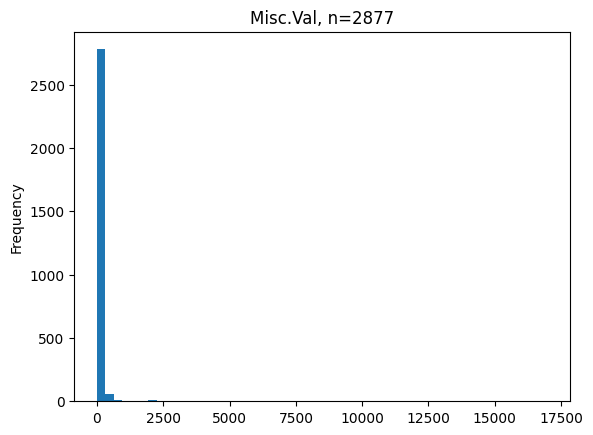

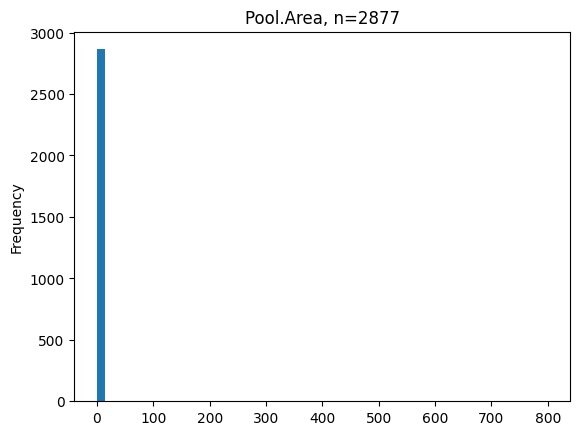

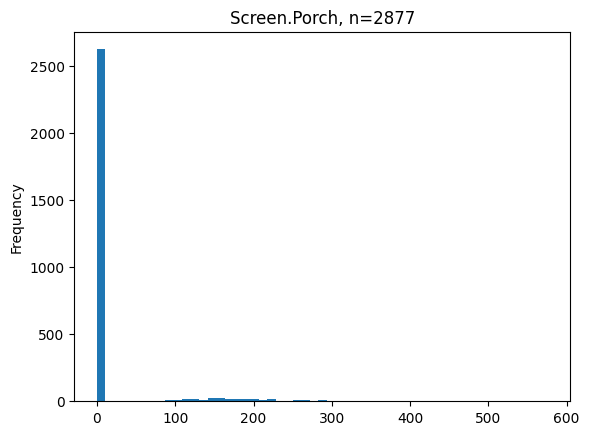

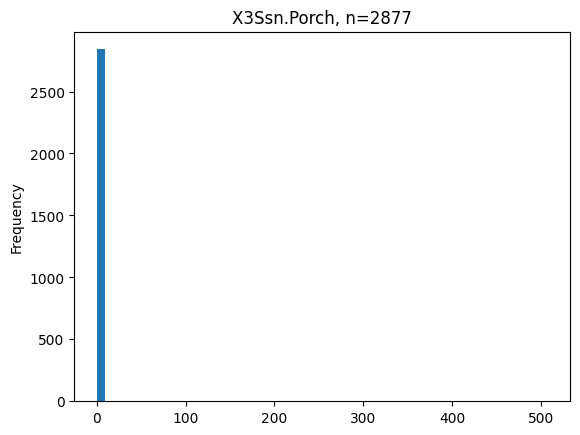

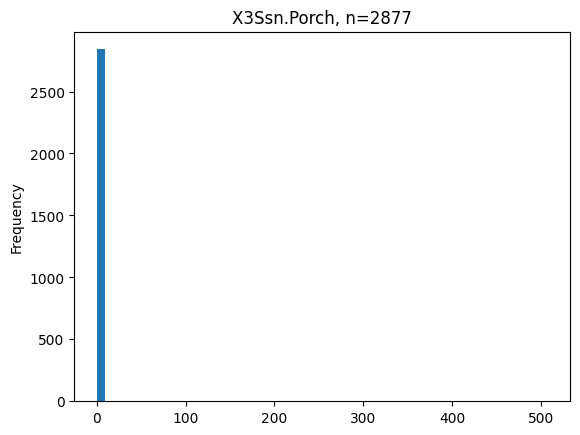

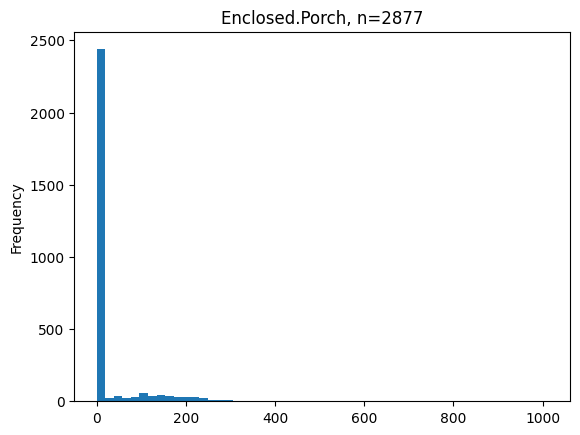

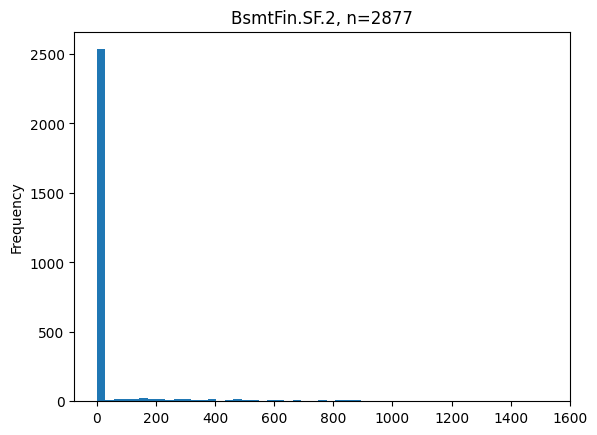

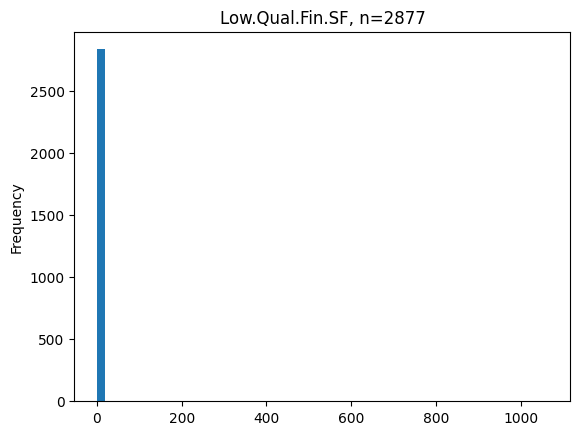

In [814]:
remover  = ['Misc.Val', 'Pool.Area', 'Screen.Porch', 'X3Ssn.Porch', 'X3Ssn.Porch', 'Enclosed.Porch','BsmtFin.SF.2','Low.Qual.Fin.SF']
plot_numericals(model_data, remover)

Seguimos com a deleção dessas colunas

In [ ]:
model_data.drop(columns=remover, inplace=True)

Em seguida, foi separado um segundo conjunto de colunas, com dados desbalanceados

              count      mean       std  min  25%  50%  75%  max
Functional   2877.0  0.151199  0.646276  0.0  0.0  0.0  0.0  7.0
Paved.Drive  2877.0  0.157108  0.517761  0.0  0.0  0.0  0.0  2.0
Land.Slope   2877.0  0.052138  0.246096  0.0  0.0  0.0  0.0  2.0
Lot.Shape    2877.0  0.403198  0.571790  0.0  0.0  0.0  1.0  3.0
Exter.Cond   2877.0  1.911366  0.366542  0.0  2.0  2.0  2.0  4.0
Electrical   2877.0  0.104275  0.380650  0.0  0.0  0.0  0.0  4.0


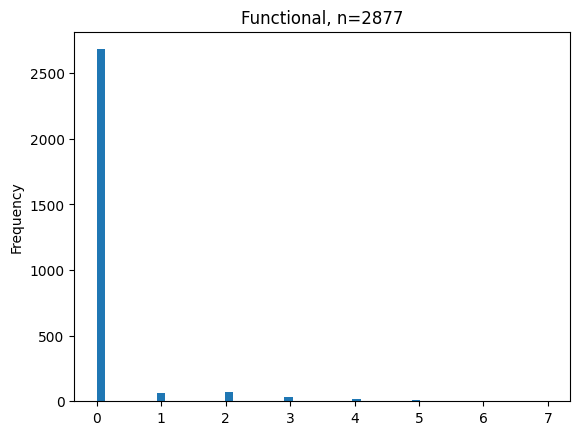

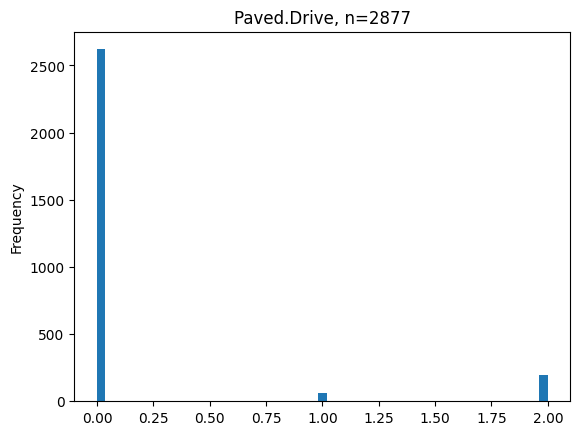

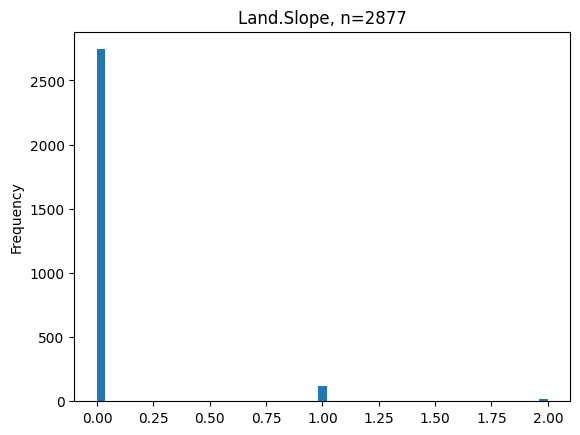

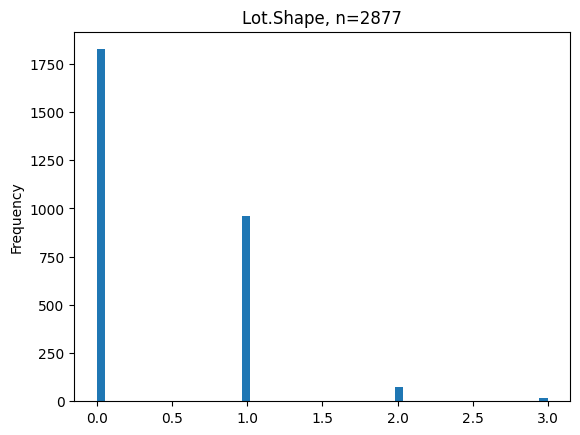

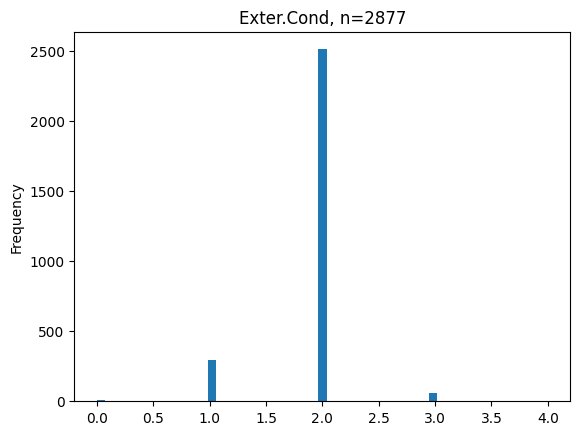

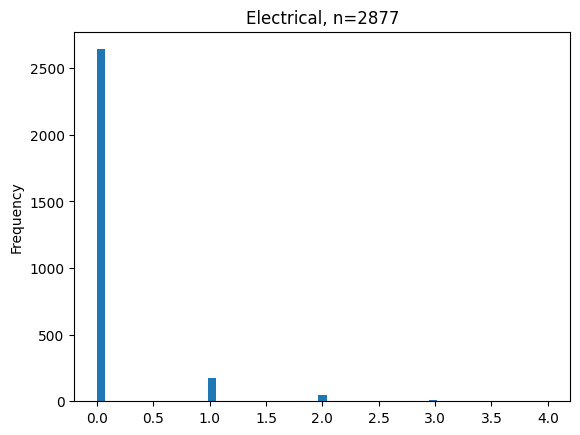

In [815]:
na_duvida = [ "Functional", "Paved.Drive", "Land.Slope", "Lot.Shape",  "Exter.Cond", "Electrical"] ## 'X2nd.Flr.SF', "Bsmt.Half.Bath"
plot_numericals(model_data, na_duvida)

In [ ]:
# for cat in categorical_columns:
#     dummies = []
#     for col in model_data.columns:
#         if col.startswith(cat + "_"):
#             dummies.append(f'"{col}"')
#     dummies_str = ', '.join(dummies)
#     print(f'From column "{cat}" we made {dummies_str}\n')

##### Acima, removemos algumas features do dataset, pois achamos que os dados pra essas features estão bastante desbalanceada e, que aliás disso, não tem uma grande relevância para definir o preço de uma casa. Com base nisso, tiramo-as do dataset.

##### Abaixo, fizemos também a aplicação do log em algumas feautures pelos seguintes motivos:
Aplicar o log nessas features pode ajudar a reduzir a escala das variáveis, tornando os dados mais próximos de uma distribuição normal.

Estabilização de Variância: Quando os dados têm uma variação desigual, aplicar o log pode ajudar a estabilizar a variância, tornando os erros mais uniformes em diferentes níveis das features.

O log tende a reduzir o impacto de outliers, tornando o modelo menos sensível a valores extremos, o que pode

Na feature Gr.Liv.Area dropamos os valores acima de 3500, pois esses eram considerados outliers.

In [ ]:

aplicar_log = ["Wood.Deck.SF", "Open.Porch.SF", "Garage.Age", "Remod.Age", "Mas.Vnr.Area", "Bsmt.Unf.SF", "BsmtFin.SF.1", "House.Age"] ## 
juntar = ["Exter.Qual"]

# dropar_a_partir_de_3000 = ["Total.Bsmt.SF", "X1st.Flr.SF", ]
drop_3500 = ["Gr.Liv.Area"]



In [ ]:
# plot_numericals(model_data, remover)

In [ ]:
model_data = model_data.loc[model_data["Gr.Liv.Area"] < 3500]

Pra reduzir a dimensionalidade e não perder informações, colocamos uma nova features chamada TotalSF, que representa o total de metros quadrado do primeiro andar, segundo andar e do porão. Achamos melhor fazer assim, pois uma feature que diz quanto metros quadrado tem dentro de uma casa é melhor que apenas dizer quantos metros quadrados tem as suas partes. Removemos as features 'Total.Bsmt.SF', 'X2nd.Flr.SF','X1st.Flr.SF'. Removendo as features 'Total.Bsmt.SF', 'X2nd.Flr.SF','X1st.Flr.SF' conseguimos uma melhora no treinamento em relação ao deixar as features 'Total.Bsmt.SF', 'X2nd.Flr.SF','X1st.Flr.SF' no dataset. Essa melhora foi de 0.1%.

In [ ]:
model_data['TotalSF'] = model_data['X1st.Flr.SF'] + model_data['X2nd.Flr.SF'] + model_data['Total.Bsmt.SF']
# model_data["TotalSF"] = model_data["TotalSF"].apply(np.log1p)
# model_data.drop(["X1st.Flr.SF", "X2nd.Flr.SF", "Total.Bsmt.SF"], axis=1, inplace=True)
# Total de Banheiros


Abaixo fizemos algo semelhante pros banheiros da casa: criamos uma nova feature TotalBath que representa a quantidade de banheiros na casa. Mantemos as features 'Full.Bath','Half.Bath', 'Bsmt.Full.Bath'e 'Bsmt.Half.Bath' porque tivemos uma melhora de 0.2% no modelo em relação ao modelos que não as tinha. Isso é justificável por quê  as features que representam a quantidade de banheiros podem conter informações relevantes para o modelo que não estão presentes na feature que representa o total de banheiros. Cada tipo de banheiro  pode influenciar o preço da casa de maneira diferente.

Quando você remove as features individuais que representam os diferentes tipos de banheiros, você está perdendo informações detalhadas. Dependendo do conjunto de dados, essa informação detalhada pode ser importante para prever com precisão o preço da casa.

Também a transformação de somar as features para obter o total não é necessariamente uma transformação monotônica. Isso significa que a relação entre o total de banheiros e o preço da casa pode não ser linear. Manter as features originais permite que o modelo capture relações não lineares.


In [ ]:
model_data['TotalBath'] = model_data['Full.Bath'] + model_data['Half.Bath'] + model_data['Bsmt.Full.Bath'] +  model_data['Bsmt.Half.Bath']


In [ ]:
model_data.drop(['Total.Bsmt.SF', 'X2nd.Flr.SF','X1st.Flr.SF'], axis=1, inplace=True)

In [ ]:
# plot_numericals(model_data, ["TotalSF"])

In [ ]:
model_data.drop(remover, axis=1, inplace=True)
# model_data.drop(na_duvida, axis=1, inplace=True)
model_data[aplicar_log] = model_data[aplicar_log].apply(np.log1p)

In [ ]:
X = model_data.drop(columns=['SalePrice']).copy()
y = model_data['SalePrice'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42  # Any number here, really.
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Best Parameters: {'model__tol': 0.01, 'model__max_iter': 1000, 'model__l1_ratio': 0.48275862068965514, 'model__alpha': 0.004520353656360241}

# Crie um novo pipeline com o melhor estimador
new_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('elastic_net', ElasticNet(alpha=0.01, l1_ratio=0.1))
])

# Fit the pipeline to the training data
new_pipeline.fit(Xtrain, ytrain)

# Faça previsões usando o novo pipeline
ypred = new_pipeline.predict(Xtest)


In [ ]:
coeficientes = new_pipeline.named_steps['elastic_net'].coef_

In [ ]:
print(list(coeficientes))
maior = 0
indice = 0
for i, v in enumerate(list(coeficientes)):
    if abs(v) > abs(maior):
        maior  = v
        indice = i
print(indice, maior)
model_data.columns[indice]

    

In [ ]:
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print(f"Root Mean Squared Error (MSE): {rmse}")


In [ ]:
error_percent = 100 * (10**rmse - 1)
print(f'Average error is {error_percent:.2f}%')